In [1]:
import h5py
import numpy as np
import pandas as pd 
import os
import numpy as np
import re
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import re

In [2]:
def convert_csv_to_txt(input_file,output_file):
   
    with open(input_file, 'r') as csv_file, open(output_file, 'w') as space_delimited_file:
        csv_reader = csv.reader(csv_file)
        for row in csv_reader:
            space_delimited_file.write(' '.join(row) + '\n')

    print(f'CSV file "{input_file}" converted to space-delimited file "{output_file}"')


In [3]:
def read_file(file):
    hf = h5py.File(file, 'r')
    attributes = []
    for key in hf.keys():
        attributes.append(key)
    
    return attributes, hf

In [4]:
def get_data(hf,attributes):
    data = []
    pm = []
    acc_pm = []
    loss_pm = []
    loss_gm = []
    for i in range(len(attributes)):
        ai = hf.get(attributes[i])
        ai = np.array(ai)
        data.append(ai)
    
    return data


In [5]:
## not using


def plot_convergence(df_loss, df_accuracy, fig_path):
    head_value = 10
    #mag_head = 20
    df_loss = df_loss.head(head_value)
    # df_accuracy = df_accuracy.head(head_value)
    fig, axs = plt.subplots(1, 1, figsize=(12, 6))  # Adjusted for better display
    
    # Define a list of colors for the plots
    colors = ['gray', 'magenta', 'black', 'red']
    
    handles, labels = [], []
    
    dfs = [(df_loss, 'log'), (df_accuracy, 'linear')]
    # manual_location_loss = (-0.02, 0.0, 1.0, 1.0)
    # manual_location_acc = (-0.015, 0.1, 1.0, 1.0)
    for ax_index, (df, scale_type) in enumerate(dfs):
        ax = axs[ax_index]
       
        for col, color in zip(sorted(df.columns), colors):  # Sorting columns and using colors
            line, = ax.plot(df.index, df[col], label=col, color=color)  # Set color manually
            handles.append(line)
            labels.append(col)

        ax.set_xticks(range(0, head_value+1, int(head_value/10))) # Setting x-axis ticks
        ax.tick_params(axis='x', labelsize=16)  
        ax.tick_params(axis='y', labelsize=16)
        ax.grid(True)
        ax.set_yscale(scale_type)  # Set y-axis scale
        
        """# Add inset for the df_loss plot
        if ax_index == 0:  # Assuming df_loss is the first plot
            axins = inset_axes(ax, width="50%", height="50%",bbox_to_anchor=manual_location_loss, loc='upper right', bbox_transform=ax.transAxes)
            df = df.head(mag_head)
            for col, color in zip(sorted(df.columns), colors):
                axins.plot(df.index, df[col], color=color)
                axins.set_yscale('log')
            # Customize the inset plot (e.g., set ticks) based on your data range
            axins.set_xticks(range(0, mag_head+1, int(mag_head/5)))
            axins.set_yticks([])
            axins.tick_params(axis='x', labelsize=14)  
            axins.tick_params(axis='y', labelsize=14)
    
        # Add inset for the df_loss plot
        if ax_index == 1:  # Assuming df_loss is the first plot
            axins = inset_axes(ax, width="40%", height="40%",bbox_to_anchor=manual_location_acc, loc='lower right', bbox_transform=ax.transAxes)
            df = df.head(mag_head)
            for col, color in zip(sorted(df.columns), colors):
                axins.plot(df.index, df[col], color=color)
                axins.set_yscale('log')
            # Customize the inset plot (e.g., set ticks) based on your data range
            axins.set_xticks(range(0, mag_head+1, int(mag_head/5)))
            axins.set_yticks([])
            axins.tick_params(axis='x', labelsize=14)  
            axins.tick_params(axis='y', labelsize=14)
"""
    unique_handles, unique_labels = [], []
    for handle, label in zip(handles, labels):
        if label not in unique_labels:
            unique_handles.append(handle)
            unique_labels.append(label)

    indexes = ['Validation Loss', 'Validation Accuracy']
    
    fontsize = 20
    for i, ax in enumerate(axs):
        ax.set_ylabel(indexes[i], fontsize=fontsize)
        ax.set_xlabel('Global Iteration', fontsize=fontsize)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.subplots_adjust(top=0.85)
    legend_fontsize = 24  # Specify font size
    legend = fig.legend(unique_handles, unique_labels, bbox_to_anchor=(0.528, 1.0), loc='upper center', ncol=4, title="", fontsize=legend_fontsize, title_fontsize=legend_fontsize)
    for legobj in legend.legendHandles:
        legobj.set_linewidth(4)
    plt.draw()
    plt.savefig(fig_path + 'client_part.png', bbox_inches='tight', dpi=300)

    plt.show()

In [13]:
def plot_convergence(df_loss, fig_path):
    head_value = 10  # Number of entries to consider
    df_loss = df_loss.head(head_value)  # Trimming the DataFrame to the first 20 entries
    
    fig, ax = plt.subplots(figsize=(8, 6))  # Creating a single plot
    
    # Define a list of colors for the plots
    colors = ['gray', 'magenta', 'black', 'red', 'blue']
    
    for col, color in zip(sorted(df_loss.columns), colors):  # Sorting columns and using colors
        ax.plot(df_loss.index, df_loss[col], label=col, color=color)  # Plot each column

    ax.set_xticks(range(0, head_value+1, int(head_value/10)))  # Setting x-axis ticks
    ax.tick_params(axis='x', labelsize=20)  
    ax.tick_params(axis='y', labelsize=20)
    ax.grid(True)
    ax.set_yscale('log')  # Assuming you want a logarithmic scale for loss
    
    ax.set_ylabel('Validation Loss', fontsize=24)
    ax.set_xlabel('Global Iteration', fontsize=24)
    
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    fig.subplots_adjust(top=0.85)
    
    legend = ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.3), shadow=True, ncol=3, fontsize=20)
    for legobj in legend.legendHandles:
        legobj.set_linewidth(4)
    
    plt.draw()
    plt.savefig(fig_path + 'loss_convergence.png', bbox_inches='tight', dpi=300)
    plt.show()

In [14]:
# Function to extract the numerical value from the column names
def extract_value(col_name):
    match = re.search(r"p = ([\d\.]+)", col_name)
    if match:
        return float(match.group(1))
    else:
        return 0

In [16]:
def convergence_analysis(path, fig_path):
    df_loss = pd.DataFrame()
    df_accuracy = pd.DataFrame()
    
    dir_list = os.listdir(path)
    #print(dir_list)
    for file_name in dir_list:
    
        if file_name.endswith(".h5"):
            # Regular expression pattern to match 'client_frac_' followed by any number
            print(file_name)
            
                # Regular expression to find 'client_frac_*'
            pattern = r'client_frac_(0\.\d+|1\.0)'

            if file_name == "_exp_no_0_GR_50_BS_124_data_silo_100_num_user_8.0.h5":
                column_name = "p = 20%"
                print(column_name)
            elif file_name == "_exp_no_0_GR_50_BS_124_data_silo_100_num_user_16.0.h5":
                column_name = "p = 40%"
                print(column_name)
            elif file_name == "_exp_no_0_GR_50_BS_124_data_silo_100_num_user_24.0.h5":
                column_name = "p = 60%"
                print(column_name)
            elif file_name == "_exp_no_0_GR_50_BS_124_data_silo_100_num_user_32.0.h5":
                column_name = "p = 80%"
                print(column_name)
            else:
                column_name = "p = 100%"
                print(column_name)
            # if eta_0_value in column_name:
                # print(f"column name : {column_name}")
            attributes, hf = read_file(path+file_name)

            data = get_data(hf,attributes)
            #id=0
            for key in hf.keys():
                attributes.append(key)
            # print(attributes)
            #id+=1
                
            val_loss = np.array(hf.get('per_test_loss'))[1:11]
            #print(f"val_loss : {val_loss}")
            val_acc = np.array(hf.get('per_test_accuracy'))[1:11]
            #print(val_acc)
            #print(f"val_acc : {val_acc}")
            # gap = np.array(hf.get('fw_gap'))
                
            df_loss[column_name] = val_loss
            df_accuracy[column_name] = val_acc
            
            # Sort the DataFrame columns based on the extracted numerical value
    sorted_columns_loss = sorted(df_loss.columns, key=extract_value)
    sorted_columns_acc = sorted(df_accuracy.columns, key=extract_value)
        # Reorder the DataFrame according to the sorted columns
    df_loss_1 = df_loss[sorted_columns_loss]
    df_acc_1 = df_accuracy[sorted_columns_acc]
    print(df_loss_1)
            # print(df_accuracy)       
    plot_convergence(df_loss_1, fig_path)

_exp_no_0_GR_50_BS_124_data_silo_100_num_user_40.0 copy.h5
p = 100%
_exp_no_0_GR_50_BS_124_data_silo_100_num_user_40.0.h5
p = 100%
_exp_no_0_GR_50_BS_124_data_silo_100_num_user_32.0.h5
p = 80%
_exp_no_0_GR_50_BS_124_data_silo_100_num_user_16.0.h5
p = 40%
_exp_no_0_GR_50_BS_124_data_silo_100_num_user_8.0.h5
p = 20%
_exp_no_0_GR_50_BS_124_data_silo_100_num_user_24.0.h5
p = 60%
    p = 20%   p = 40%   p = 60%   p = 80%  p = 100%
0  2.261729  2.265813  2.237951  2.209696  2.182470
1  2.252220  2.255595  2.283209  2.261861  2.163446
2  2.203891  2.290757  2.287388  2.280208  2.131572
3  2.279679  2.284789  2.283268  2.284349  2.121617
4  2.250573  2.288670  2.286987  2.287417  2.109491
5  2.291839  2.294556  2.287831  2.291592  2.100901
6  2.288445  2.295862  2.290841  2.288234  2.083762
7  2.190725  2.291692  2.290084  2.284305  2.091918
8  2.293596  2.290493  2.289180  2.284388  2.086582
9  2.289132  2.291032  2.287754  2.284191  2.084150


/tmp/ipykernel_1857065/218267087.py:26: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for legobj in legend.legendHandles:


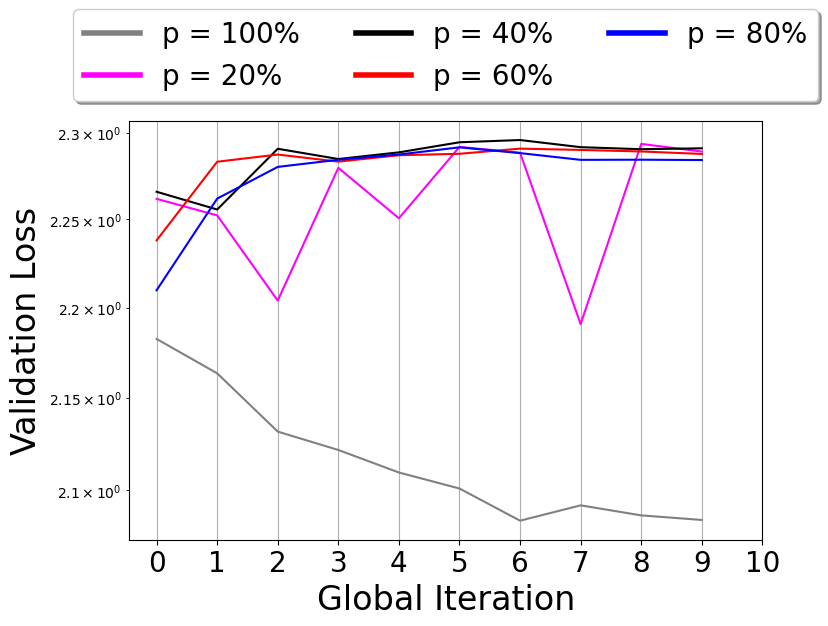

In [17]:
path = "/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo_100/target_10/dynamic/convergence_client_part/"
fig_path = '/proj/sourasb-220503/FedMEM/results/ResNet50TL/Fedmem/data_silo_100/target_10/dynamic/convergence_client_part/'
convergence_analysis(path, fig_path)